# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_spec1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")

In [3]:
data_spec1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Standardization of columns names into lower cases
data_spec1.columns = data_spec1.columns.str.lower().str.replace(" ","_")

data_spec1

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Renaming column 
data_spec1 = data_spec1.rename(columns={"st": "state"})

In [6]:
column_names = data_spec1.columns
print(column_names)
# as we can see below in the list of column names the previous column name called st is now state

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [7]:
data_spec1['gender'].unique()
# Replace inconsistent and incorrect values with "F"

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [8]:
# Replace inconsistent and incorrect values with "F"
data_spec1['gender'] = data_spec1['gender'].replace({"Femal":"F", "female": "F",})


In [9]:
data_spec1['gender'] = data_spec1['gender'].replace({"Male":"M"})
# Replace inconsistent and incorrect values with "F"

In [10]:
gender_counts = data_spec1['gender'].value_counts()

# Display the count for each gender value
for gender, count in gender_counts.items():
    print(f"{gender}: {count}")


F: 502
M: 452


In [11]:
data_spec1['gender'].unique() # looking at the output below we are now sure that the inconsistent values were changed to "F" and "M"

array([nan, 'F', 'M'], dtype=object)

In [12]:
data_spec1['state'] = data_spec1['state'].replace({"AZ": "Arizona", "Cali": "California", "WA": "Washington"})
# State abbreviationsreplaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"

In [13]:
state_counts = data_spec1['state'].value_counts()

# Display the count for each state value to make sure that we do not have abbreviations
for state, count in state_counts.items():
    print(f"{state}: {count}")

California: 331
Oregon: 320
Arizona: 211
Washington: 111
Nevada: 98


In [14]:
data_spec1['education'].unique()
# Replacement of the value Bachelors to Bachelor

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [15]:
data_spec1['education'] = data_spec1['education'].replace({'Bachelors':'Bachelor',})
# Replacement of the value Bachelors to Bachelor

In [16]:
data_spec1['education'].unique() 
# Replacement of the value Bachelors to Bachelor

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [17]:
# Remove the "%" character from the "customer_lifetime_value" column
data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value'].str.replace('%', '')


In [18]:
data_spec1['customer_lifetime_value'].unique() 
# character "%" removed 

array([nan, '697953.59', '1288743.17', ..., '2031499.76', '323912.47',
       '899704.02'], dtype=object)

In [19]:
data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value'].astype(float)

# divide the column customer_lifetime_vlaue by 100 but no after turning into a float

In [20]:
data_spec1['customer_lifetime_value'].unique()
# column column customer_lifetime_vlaue is now a float as we can see below

array([       nan,  697953.59, 1288743.17, ..., 2031499.76,  323912.47,
        899704.02])

In [21]:
data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value']/100
# code to divide by 100

In [22]:
data_spec1['customer_lifetime_value'].unique()
# new result of the division by 100

array([       nan,  6979.5359, 12887.4317, ..., 20314.9976,  3239.1247,
        8997.0402])

In [23]:
data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value'].round(2)
# code to round the result of the division by 100 by 2 digits

In [24]:
data_spec1['customer_lifetime_value'].unique()
# new result of the division by 100 rounded by 2 digits


array([     nan,  6979.54, 12887.43, ..., 20315.  ,  3239.12,  8997.04])

In [25]:
#In vehicle class column replace, "Sports Car", "Luxury SUV" and "Luxury Car" by "Luxury"

data_spec1['vehicle_class'] = data_spec1['vehicle_class'].replace({"Sports Car":"Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"})


In [26]:
data_spec1['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [27]:
data_spec1.dtypes
#Customer lifetime value should be numeric , as we can see below it is a float due to the code performed above in line 97 

data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value'].astype(float)

In [28]:
data_spec1['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [29]:
#the name number_of_open complaints suggests that this variable is a float or numeric but we can see above that is an object.

data_spec1['number_of_open_complaints'] = data_spec1['number_of_open_complaints'].replace({"A": 0,"B": 1, "C":2,"D":3,"E": 4, "F":5})

In [30]:
data_spec1['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [31]:
data_spec1.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

In [32]:
# Identify columns with null values
null_columns = data_spec1.columns[data_spec1.isnull().any()]

# Count the number of null values (NaN) in each column
null_counts = data_spec1[null_columns].isnull().sum()

# Print the columns with null values and the number of null values in each
for column, count in null_counts.items():
    print(f"Column '{column}' has {count} null values (NaN).")




Column 'customer' has 2937 null values (NaN).
Column 'state' has 2937 null values (NaN).
Column 'gender' has 3054 null values (NaN).
Column 'education' has 2937 null values (NaN).
Column 'customer_lifetime_value' has 2940 null values (NaN).
Column 'income' has 2937 null values (NaN).
Column 'monthly_premium_auto' has 2937 null values (NaN).
Column 'number_of_open_complaints' has 2937 null values (NaN).
Column 'policy_type' has 2937 null values (NaN).
Column 'vehicle_class' has 2937 null values (NaN).
Column 'total_claim_amount' has 2937 null values (NaN).


Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [33]:
# List of columns to check for NaN values created
columns_to_check = [
    "customer",
    "state",
    "gender",
    "education",
    "customer_lifetime_value",
    "income",
    "monthly_premium_auto",
    "number_of_open_complaints",
    "policy_type",
    "vehicle_class",
    "total_claim_amount",
]

# To drop rows with NaN values it was used the dropna method with the subset parameter to drop rows that have NaN values
data_spec1 = data_spec1.dropna(subset=columns_to_check)

# The data_spec1 now contains rows with NaN values in the specified columns dropped.


In [34]:
data_spec1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [35]:
data_spec1 = data_spec1.drop_duplicates()


# In this dealing with duplicates exercise that I later found out that should have been started in the very first line of command the outcome 
# is severly afected by the drop of the Nulls approach. The Data frame was with 4008 rows and 11 columns after the identification of Null elements and drop of those elements.
# It went from 4008 rows to 952 and the number of columns maintained.
# After running the duplicate identification we found out that the number of rows is still 952,which means that most of the duplicates were Null values and therefore already dropped.
# So from the previous line and out of pure luck the null values drop as also treated the duplicates , leaving us with no action to take here.

In [36]:
data_spec1

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,8256.30,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,20315.00,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


In [37]:
data_spec1.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1066    False
1067    False
1068    False
1069    False
1070    False
Length: 952, dtype: bool

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [38]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [39]:
# Lab Customer Analysis Round 3

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data_spec1.info()

#Show DataFrame info.
#Describe DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   952 non-null    object 
 1   state                      952 non-null    object 
 2   gender                     952 non-null    object 
 3   education                  952 non-null    object 
 4   customer_lifetime_value    952 non-null    float64
 5   income                     952 non-null    float64
 6   monthly_premium_auto       952 non-null    float64
 7   number_of_open_complaints  952 non-null    object 
 8   policy_type                952 non-null    object 
 9   vehicle_class              952 non-null    object 
 10  total_claim_amount         952 non-null    float64
dtypes: float64(4), object(7)
memory usage: 89.2+ KB


In [42]:
data_spec1.describe()

#Show DataFrame info.
#Describe DataFrame.

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,952.000000,952.000000,952.000000,952.000000
mean,7942.012826,39557.350840,205.231092,404.999156
std,6258.791672,30744.561851,1697.752504,299.238726
min,2004.350000,0.000000,61.000000,0.382107
25%,4117.837500,13087.750000,68.000000,196.724587
50%,5885.745000,36632.000000,83.000000,350.400000
75%,9037.512500,65085.500000,110.000000,534.000000
max,44795.470000,99960.000000,35354.000000,2893.239678


In [43]:
def identify_dimensions(data_frame):
   
    num_rows, num_columns = data_spec1.shape
    return num_rows, num_columns


num_rows, num_columns = identify_dimensions(data_spec1)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

#Show DataFrame info.
#Describe DataFrame.

Number of rows: 952
Number of columns: 11


<Axes: xlabel='gender', ylabel='count'>

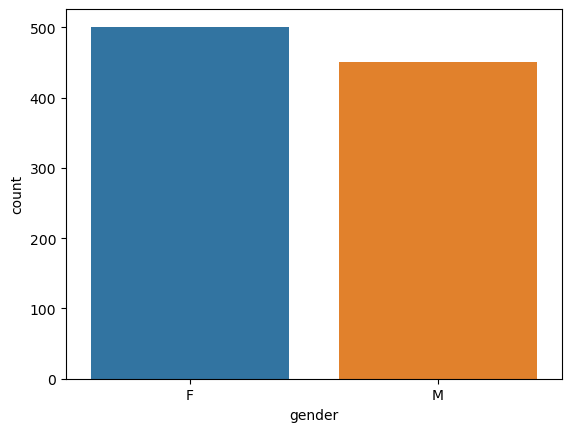

In [44]:
sns.countplot(x='gender', data=data_spec1)

In [45]:
#from the plots below we can see that the gender F is the majority, this said we have more female costumers than masculin costumers

<Axes: xlabel='income', ylabel='state'>

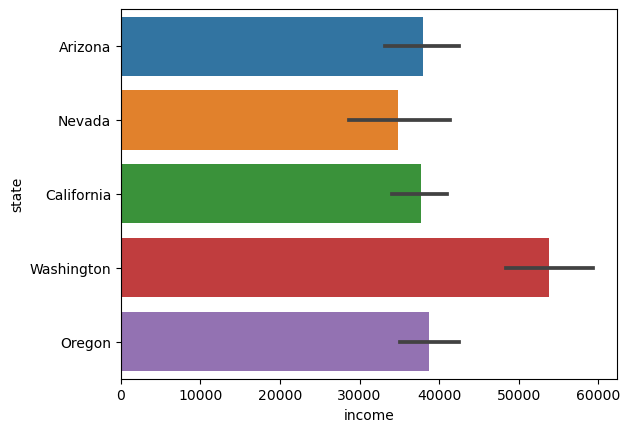

In [46]:
sns.barplot(y="state", x="income",data=data_spec1)

In [47]:
# Income mean or average is higher in the Washington State

<Axes: xlabel='policy_type', ylabel='total_claim_amount'>

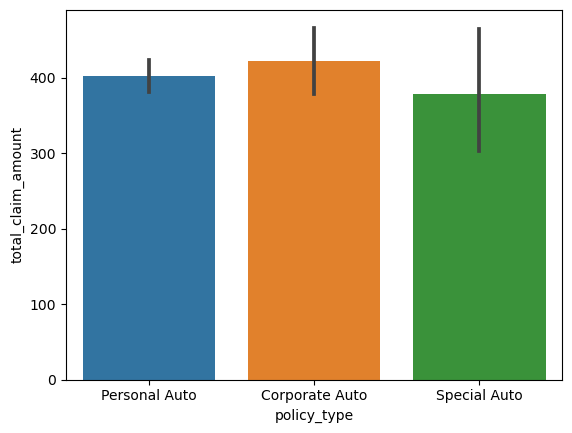

In [48]:
sns.barplot(x="policy_type", y="total_claim_amount",data=data_spec1)

In [49]:
# the policy type Corporate Auto has the highest total claim amount average, and Personal Auto follows right after

In [50]:
unique_values = data_spec1['education'].unique()
print(unique_values)

['Bachelor' 'High School or Below' 'College' 'Master' 'Doctor']


In [51]:
unique_values = data_spec1['vehicle_class'].unique()
print(unique_values)

['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury']


[None, None, None, None, None, None, None, None, None, None]

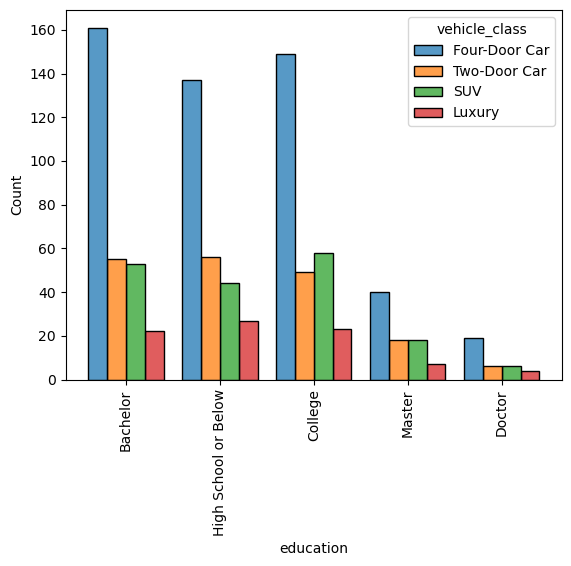

In [52]:
z = sns.histplot(data=data_spec1, x="education", hue="vehicle_class", multiple="dodge", shrink=.8)
plt.setp(z.get_xticklabels(), rotation=90)

<Axes: xlabel='education', ylabel='Count'>

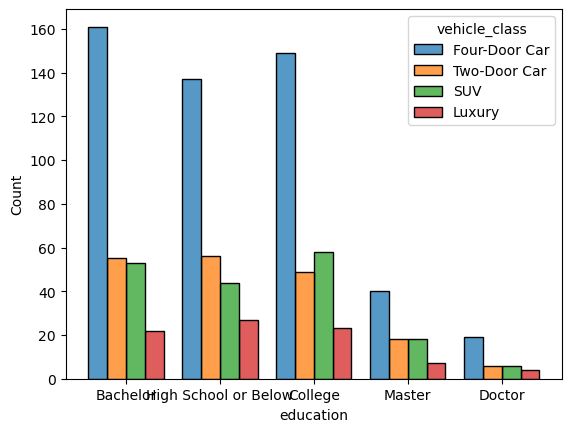

In [53]:
sns.histplot(data=data_spec1, x="education", hue="vehicle_class", multiple="dodge", shrink=.8)

In [54]:
# From the plots below we can see that surprisingly individuals with a higher level of education are associated with fewer luxury cars insurance and
# insurance for luxury cars associated to individuals only with high school or below education level

In [55]:
#Lab Customer Analysis Round 4

In [56]:
#Data Types of each column
selected_columns = [
    'customer',
    'state',
    'gender',
    'education',
    'customer_lifetime_value',
    'income',
    'monthly_premium_auto',
    'number_of_open_complaints',
    'policy_type',
    'vehicle_class',
    'total_claim_amount'
]


data_types = data_spec1[selected_columns].dtypes

print(data_types)


customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [57]:
unique_complaints = data_spec1['number_of_open_complaints'].unique()

# Print the unique values
print(unique_complaints)


['1/0/00' '1/1/00' '1/2/00' '1/4/00' '1/3/00' '1/5/00']


In [58]:
data_spec1['customer_lifetime_value'] = data_spec1['customer_lifetime_value'].astype(float)

In [59]:
selected_columns = [
    'customer',
    'state',
    'gender',
    'education',
    'customer_lifetime_value',
    'income',
    'monthly_premium_auto',
    'number_of_open_complaints',
    'policy_type',
    'vehicle_class',
    'total_claim_amount'
]


data_types = data_spec1[selected_columns].dtypes

print(data_types)

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [60]:
# Selecting numeric columns
numerical = data_spec1.select_dtypes(include=[np.number])

# Selecting categorical columns
categorical = data_spec1.select_dtypes(include=[object])

# Now, 'numerical' contains the numeric data, and 'categorical' contains the categorical data


In [61]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
1,6979.54,0.0,94.0,1131.464935
2,12887.43,48767.0,108.0,566.472247
3,7645.86,0.0,106.0,529.881344
4,5363.08,36357.0,68.0,17.269323
5,8256.30,62902.0,69.0,159.383042
...,...,...,...,...
1066,3059.55,38644.0,78.0,361.455219
1067,20315.00,63209.0,102.0,207.320041
1068,3239.12,16061.0,88.0,633.600000
1069,4626.80,79487.0,114.0,547.200000


In [62]:
categorical

,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,1/1/00,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,1/2/00,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,1/0/00,Special Auto,SUV


In [63]:
data_spec1['number_of_open_complaints'].unique()

array(['1/0/00', '1/1/00', '1/2/00', '1/4/00', '1/3/00', '1/5/00'],
      dtype=object)

In [64]:
recent_list = []

for item in data_spec1["number_of_open_complaints"]:
    recent_list.append(item.split("/")[1])
    
data_spec1['number_of_open_complaints']=recent_list
data_spec1['number_of_open_complaints']

1       0
2       0
3       0
4       0
5       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 952, dtype: object

In [65]:
data_spec1['number_of_open_complaints']=pd.to_numeric(data_spec1['number_of_open_complaints'], errors = "coerce")

In [66]:
data_spec1.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [67]:
from sklearn import linear_model

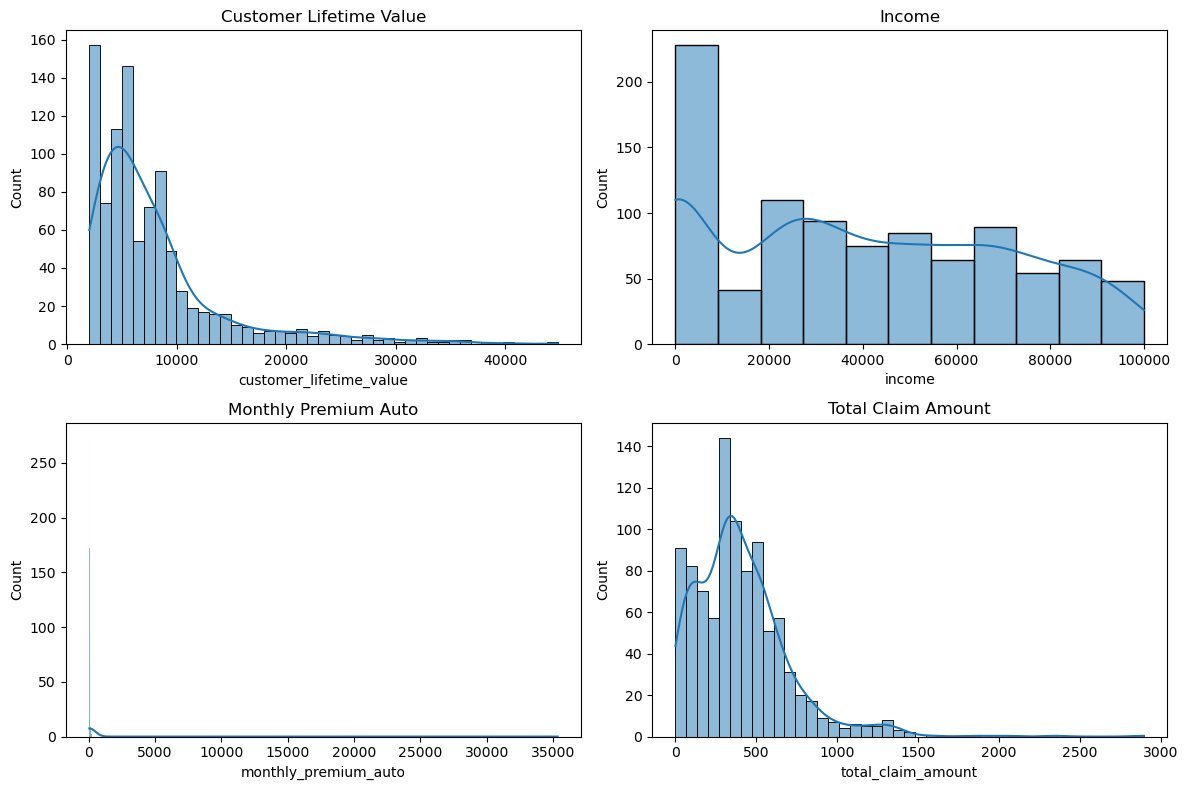

In [68]:
# numerical' DataFrame from the previous step

# Set up subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Create distribution plots for each numerical variable
sns.histplot(numerical['customer_lifetime_value'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Customer Lifetime Value')

sns.histplot(numerical['income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income')

sns.histplot(numerical['monthly_premium_auto'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Monthly Premium Auto')

sns.histplot(numerical['total_claim_amount'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Claim Amount')

#sns.histplot(categorical['number_of_open_complaints'], kde=True, ax=axes[0, 0])
#axes[0, 0].set_title('Number_of_open_complaints')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Startklar\AppData\Local\Temp\ipykernel_25616\1171304852.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['customer_lifetime_value'], kde=True)


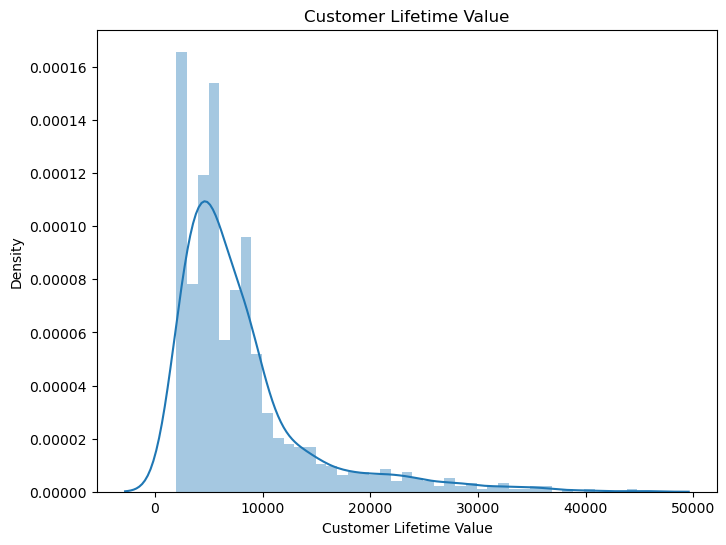

In [69]:
# Assuming you have the 'numerical' DataFrame from the previous steps

# Create a distribution plot for "customer_lifetime_value"
plt.figure(figsize=(8, 6))  # Set the figure size

sns.distplot(numerical['customer_lifetime_value'], kde=True)
plt.title("Customer Lifetime Value")
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Density")

# Show the plot
plt.show()


C:\Users\Startklar\AppData\Local\Temp\ipykernel_25616\1696365942.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['income'], kde=True)


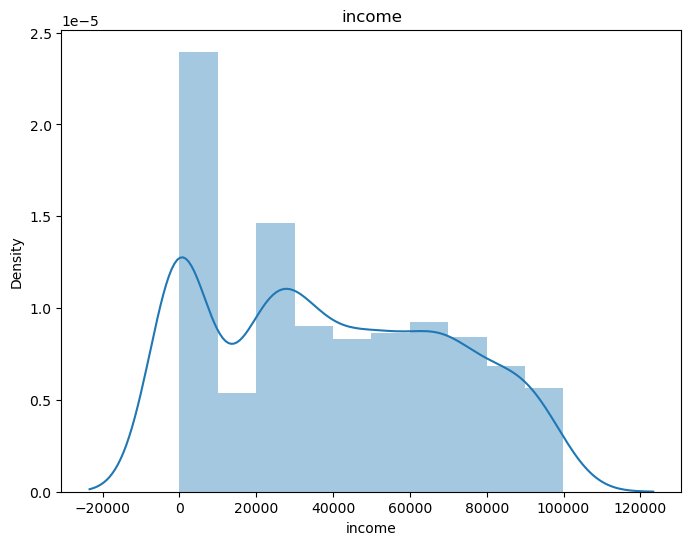

In [70]:
#Seaborn being used to build distribution plot

plt.figure(figsize=(8, 6)) 

sns.distplot(numerical['income'], kde=True)
plt.title("income")
plt.xlabel("income")
plt.ylabel("Density")

plt.show()

C:\Users\Startklar\AppData\Local\Temp\ipykernel_25616\2062045691.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['monthly_premium_auto'], kde=True)


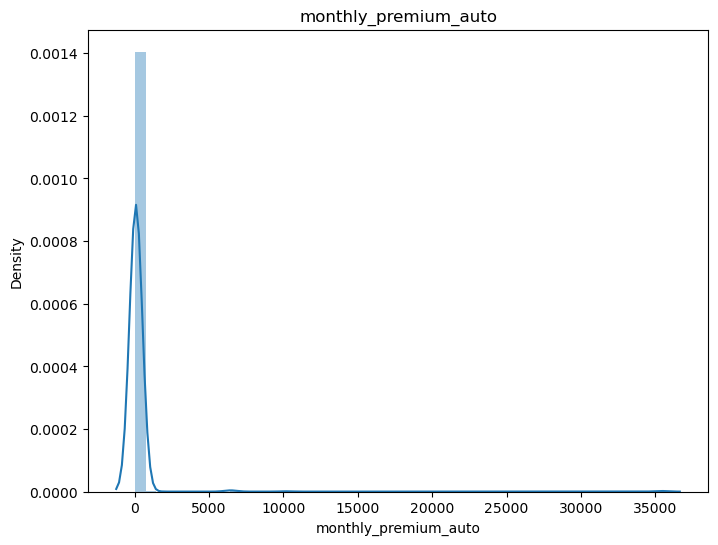

In [71]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.distplot(numerical['monthly_premium_auto'], kde=True)
plt.title("monthly_premium_auto")
plt.xlabel("monthly_premium_auto")
plt.ylabel("Density")

plt.show()

C:\Users\Startklar\AppData\Local\Temp\ipykernel_25616\2438354495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['total_claim_amount'], kde=True)


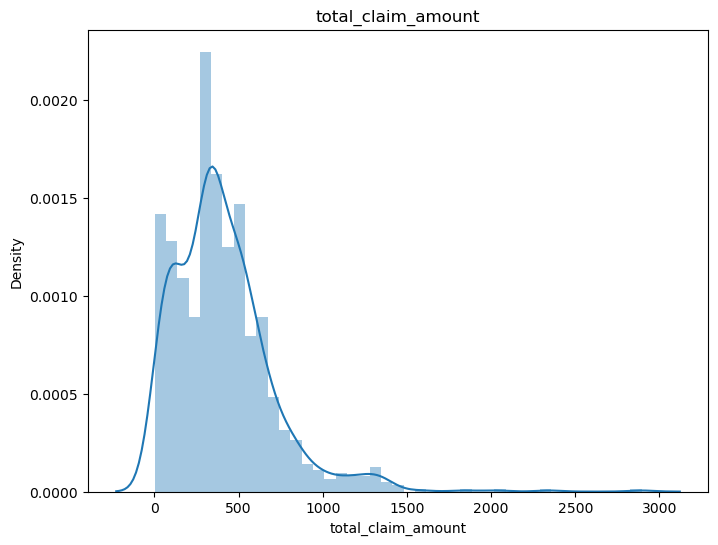

In [72]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.distplot(numerical['total_claim_amount'], kde=True)
plt.title("total_claim_amount")
plt.xlabel("total_claim_amount")
plt.ylabel("Density")

plt.show()

In [73]:
correlations_matrix = numerical.corr()
correlations_matrix
correlations_matrix = numerical.select_dtypes("number").corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.030614,0.004180,0.139519
income,0.030614,1.000000,0.051882,-0.366088
monthly_premium_auto,0.004180,0.051882,1.000000,-0.041990
total_claim_amount,0.139519,-0.366088,-0.041990,1.000000


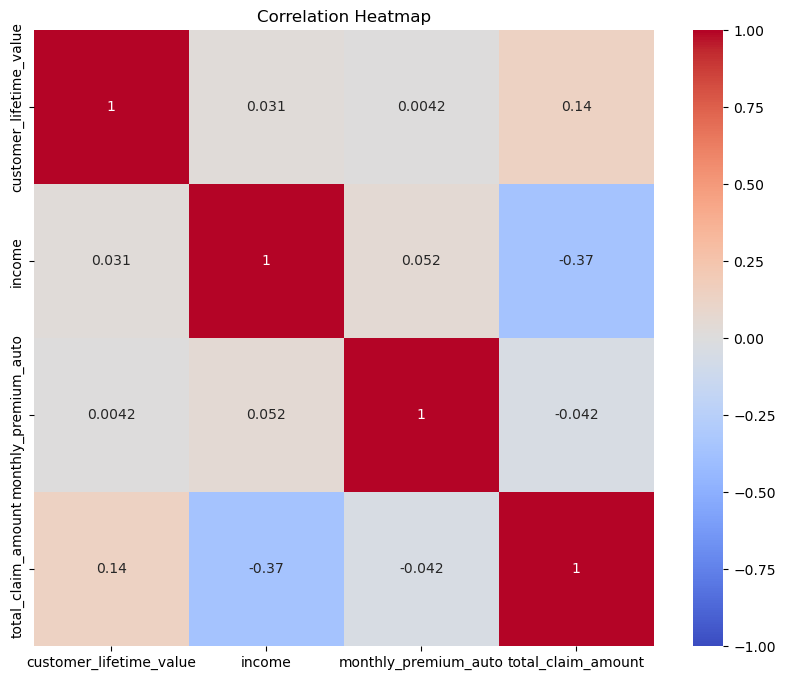

In [74]:
#Using numerical variables, to check multicollinearity between the variables in X

correlation_matrix = numerical.corr()

# Creation of a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()

# Identification of pairs on highly correlated features
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


In [75]:
# As we can see above from the multicolliniarity check frame the correlations are weak, so it doesn't seem to be that much of Multicolliniarity between the features.

In [76]:
#Lab Customer Analysis Round 5

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# X y split

X=data_spec1.drop(['total_claim_amount'], axis=1)
y=data_spec1['total_claim_amount']


In [79]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
1,6979.54,0.0,94.0,1131.464935
2,12887.43,48767.0,108.0,566.472247
3,7645.86,0.0,106.0,529.881344
4,5363.08,36357.0,68.0,17.269323
5,8256.30,62902.0,69.0,159.383042
...,...,...,...,...
1066,3059.55,38644.0,78.0,361.455219
1067,20315.00,63209.0,102.0,207.320041
1068,3239.12,16061.0,88.0,633.600000
1069,4626.80,79487.0,114.0,547.200000


In [80]:
categorical

,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,1/1/00,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,1/2/00,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,1/0/00,Special Auto,SUV


In [81]:
# If the 'customer' column exists, this code will remove it.
if 'customer' in data_spec1.columns:
    categorical = data_spec1.drop(columns=['customer'])

# Now, the 'customer' column has been dropped from the 'categorical' DataFrame.


In [82]:
categorical

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,Oregon,F,Bachelor,8256.30,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042
...,...,...,...,...,...,...,...,...,...,...
1066,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,California,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


In [83]:
X_num1 = X.select_dtypes(include = np.number)
X_cat1 = X.select_dtypes(include = object)

In [84]:
X_num1.shape

(952, 4)

In [85]:
X_num1

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
1,6979.54,0.0,94.0,0
2,12887.43,48767.0,108.0,0
3,7645.86,0.0,106.0,0
4,5363.08,36357.0,68.0,0
5,8256.30,62902.0,69.0,0
...,...,...,...,...
1066,3059.55,38644.0,78.0,1
1067,20315.00,63209.0,102.0,2
1068,3239.12,16061.0,88.0,0
1069,4626.80,79487.0,114.0,0


In [102]:
X_cat1

,customer,state,gender,education,policy_type,vehicle_class
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,OC83172,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,Personal Auto,Four-Door Car
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV


In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
X_num1.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
count,952.000000,952.000000,952.000000,952.000000
mean,7942.012826,39557.350840,205.231092,0.378151
std,6258.791672,30744.561851,1697.752504,0.872446
min,2004.350000,0.000000,61.000000,0.000000
25%,4117.837500,13087.750000,68.000000,0.000000
50%,5885.745000,36632.000000,83.000000,0.000000
75%,9037.512500,65085.500000,110.000000,0.000000
max,44795.470000,99960.000000,35354.000000,5.000000


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [89]:
transformer = MinMaxScaler().fit(X_num1)
X_norm = transformer.transform(X_num1)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num1.columns)
X_num_scale

(952, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.116267,0.000000,0.000935,0.0
1,0.254330,0.487865,0.001332,0.0
2,0.131838,0.000000,0.001275,0.0
3,0.078491,0.363715,0.000198,0.0
4,0.146104,0.629272,0.000227,0.0
...,...,...,...,...
947,0.024659,0.386595,0.000482,0.2
948,0.427908,0.632343,0.001162,0.4
949,0.028856,0.160674,0.000765,0.0
950,0.061285,0.795188,0.001502,0.0


In [90]:
#Lab Customer Analysis Round 6

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
if 'customer' in X_cat1.columns:
    categorical = X_cat1.drop(columns=['customer'])

In [105]:
X_cat1.drop(X_cat1.columns[[0]], axis=1, inplace=True)

In [106]:
X_cat1

,state,gender,education,policy_type,vehicle_class
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
5,Oregon,F,Bachelor,Personal Auto,Two-Door Car
...,...,...,...,...,...
1066,Oregon,M,Master,Personal Auto,Four-Door Car
1067,California,F,High School or Below,Personal Auto,SUV
1068,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,California,F,Master,Special Auto,SUV


In [107]:
#OneHot Encoding for categorical variables

encoder = OneHotEncoder(drop="first").fit(X_cat1)
encoded = encoder.transform(X_cat1).toarray()
X_cat_encode = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
X_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [109]:
#Concat DataFrames encoded categorical + numerical = conc_num_cat

X = pd.concat([X_num_scale,X_cat_encode],axis=1)

In [110]:
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.116267,0.000000,0.000935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.254330,0.487865,0.001332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.131838,0.000000,0.001275,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.078491,0.363715,0.000198,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.146104,0.629272,0.000227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.024659,0.386595,0.000482,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
948,0.427908,0.632343,0.001162,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
949,0.028856,0.160674,0.000765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
950,0.061285,0.795188,0.001502,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [111]:
X.shape

(952, 18)

In [ ]:
# Lab Customer Analysis Final Round

In [112]:
y = data_spec1 ['total_claim_amount']
y         

1       1131.464935
2        566.472247
3        529.881344
4         17.269323
5        159.383042
           ...     
1066     361.455219
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
Name: total_claim_amount, Length: 952, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 18)
(96, 18)
(856,)
(96,)


In [115]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
72,0.102980,0.617337,0.000595,0.4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
543,0.011924,0.438776,0.000113,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.146091,0.540616,0.001190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
947,0.024659,0.386595,0.000482,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
926,0.155297,0.944268,0.001303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
y_train.head()

189     275.395894
661     156.124914
161      59.987126
1066    361.455219
1045     85.063708
Name: total_claim_amount, dtype: float64

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [120]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.39075920284748733

In [121]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.4569267089775002